# QCTO - Workplace Module

### Project Title: Vegetable Prices
#### Done By: Nkhubalale Emmanuel Nkadimeng

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [213]:
# Import necessary libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns     # For advanced visualizations
from datetime import datetime  # For date handling



---
<a id="two"></a>
## **Data Collection and Description**
[Back to Table of Contents](#cont)

* **Purpose:** The purpose of this section is to describe how the Vegetable Prices dataset was collected and provide an overview of its characteristics, including its sources, collection methods, and data types.
* **Details:** The Vegetable Prices dataset is sourced from Kaggle, a popular platform for data science and machine learning enthusiasts. Kaggle hosts a variety of datasets contributed by users, making it an excellent resource for accessing diverse data.

### **Dataset Overview**
- **Size:** The dataset typically contains thousands of entries covering several years.
- **Scope:** It includes price data for various vegetables sold in different markets over a specified time period.
- **Types of Data Available:**
  - **Numerical:** Price and quantity sold.
  - **Categorical:** Vegetable names and market names.
  - **Temporal:** Dates of recorded prices.

This dataset provides valuable insights into market trends and pricing dynamics, aiding in analyses related to seasonal variations and economic factors affecting vegetable pricing.


---


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [214]:
# Load the dataset from a CSV file
vegetable_prices = pd.read_csv('prices.csv')

# Display the first few rows of the dataset to understand its structure
display(vegetable_prices.head())

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** This section outlines the steps involved in handling missing values, removing outliers, correcting errors, and possibly reducing the dataset by filtering based on certain criteria or features.

### Steps for Data Cleaning and Filtering

1. **Handling Missing Values:**
   - Identify missing values in the dataset using `isnull()` or `isna()`.
   - Decide on a strategy to handle them:
     - **Removal**: Drop rows or columns with excessive missing values.
     - **Imputation**: Fill missing values with appropriate substitutes (mean, median, mode, etc.).

  

In [215]:
# Check for missing values
missing_values = vegetable_prices.isnull().sum()
display(missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [216]:
# check for duplicates 

duplicates = vegetable_prices.duplicated().sum()
print(f"There are {duplicates} duplicate rows in the dataset")

There are 0 duplicate rows in the dataset


Checking for Negative Prices

As part of our data cleaning process, it is essential to verify that all prices in the dataset are valid. Negative prices are not logical in the context of vegetable pricing and may indicate data entry errors or inconsistencies. 

In this step, we will check each price column for any negative values and count how many such instances exist. This will help us identify any potential issues that need to be addressed before proceeding with further analysis.

In [217]:
# Check for negative prices in the relevant columns
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Create a DataFrame to store the results
negative_prices = {}

for column in price_columns:
    negative_count = (vegetable_prices[column] < 0).sum()  # Count negative prices
    negative_prices[column] = negative_count

# Display the count of negative prices for each vegetable
print("Negative Prices Count:")
for vegetable, count in negative_prices.items():
    print(f"{vegetable}: {count}")

Negative Prices Count:
Bhindi (Ladies finger): 0
Tomato: 0
Onion: 0
Potato: 0
Brinjal: 0
Garlic: 0
Peas: 0
Methi: 0
Green Chilli: 0
Elephant Yam (Suran): 0


Checking data types of the stored data.

In [218]:
vegetable_prices.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object

In [219]:
# Convert the 'Price Dates' column to datetime format
vegetable_prices['Price Dates'] = pd.to_datetime(vegetable_prices['Price Dates'], format='%d-%m-%Y', errors='coerce')

# List of price columns that need to be converted to float
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Convert each price column to float
for column in price_columns:
    vegetable_prices[column] = vegetable_prices[column].astype(float)

# Verify the data types after conversion
print(vegetable_prices.dtypes)

Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                           float64
Onion                            float64
Potato                           float64
Brinjal                          float64
Garlic                           float64
Peas                             float64
Methi                            float64
Green Chilli                     float64
Elephant Yam (Suran)             float64
dtype: object


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---
### 1. Summary Statistics
Before diving into visualizations, it's helpful to look at summary statistics to understand the central tendency and spread of the data.



In [220]:

# Display summary statistics for numerical columns
summary_statistics = vegetable_prices.describe()
display(summary_statistics)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973


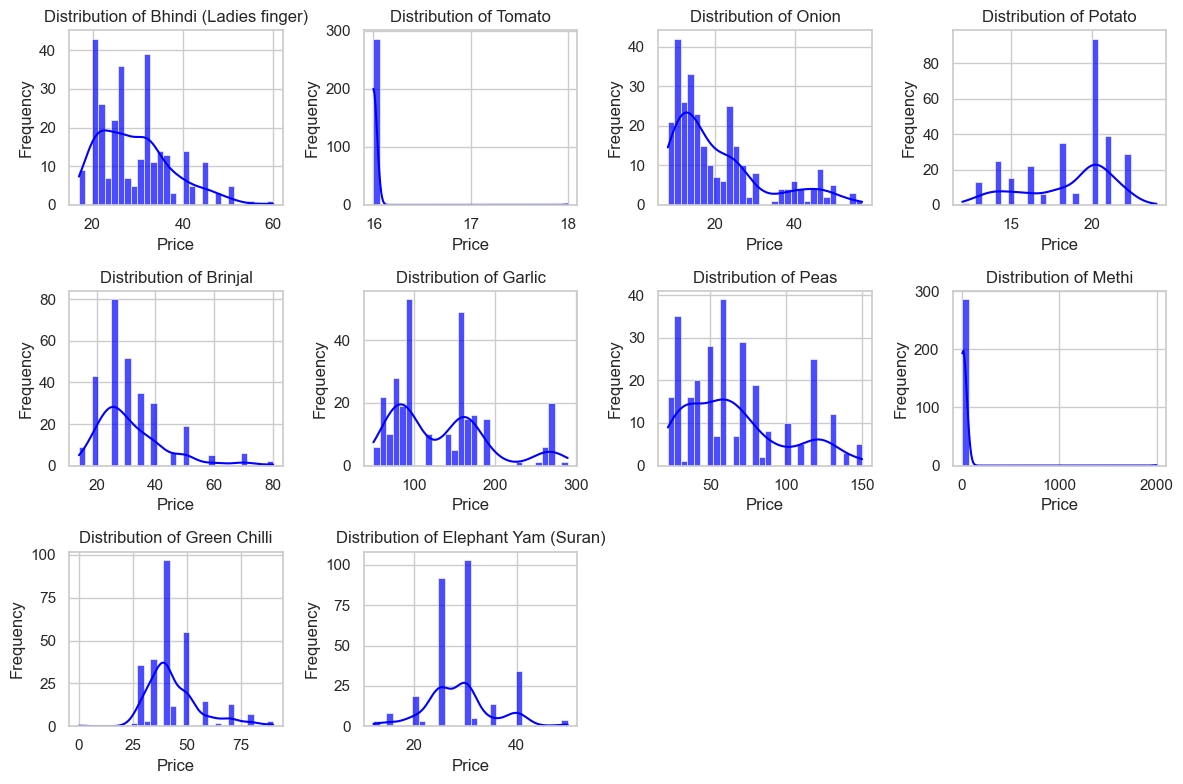

In [221]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a histogram for each vegetable price with KDE (Kernel Density Estimate)
plt.figure(figsize=(12, 8))

# Loop through each price column to create individual histograms
for column in price_columns:
    plt.subplot(3, 4, price_columns.index(column) + 1)  # Create subplots
    sns.histplot(data=vegetable_prices, x=column, bins=30, kde=True, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Observation on Price Distribution

The distribution of prices for tomatoes and methi (fenugreek) reveals that their prices remain relatively constant throughout the observed period, unlike the prices of other vegetables, which exhibit significant fluctuations.

Possible Causes for Price Stability in Tomatoes and Methi:

1. **Supply and Demand Dynamics**:
   - **Stable Supply**: Tomatoes and methi may have a more stable supply chain due to consistent agricultural practices. While other vegetables might face seasonal shortages or surpluses, tomatoes and methi can be produced year-round in various climates.
   - **Consistent Demand**: Both tomatoes and methi are staples in many cuisines, leading to steady demand that mitigates price fluctuations.

2. **Storage and Preservation Techniques**:
   - **Preservation Methods**: Tomatoes can be processed into sauces, pastes, or canned products, allowing for better management of supply during off-peak seasons. Similarly, methi can be dried or frozen, helping to stabilize prices by smoothing out seasonal variations in availability.

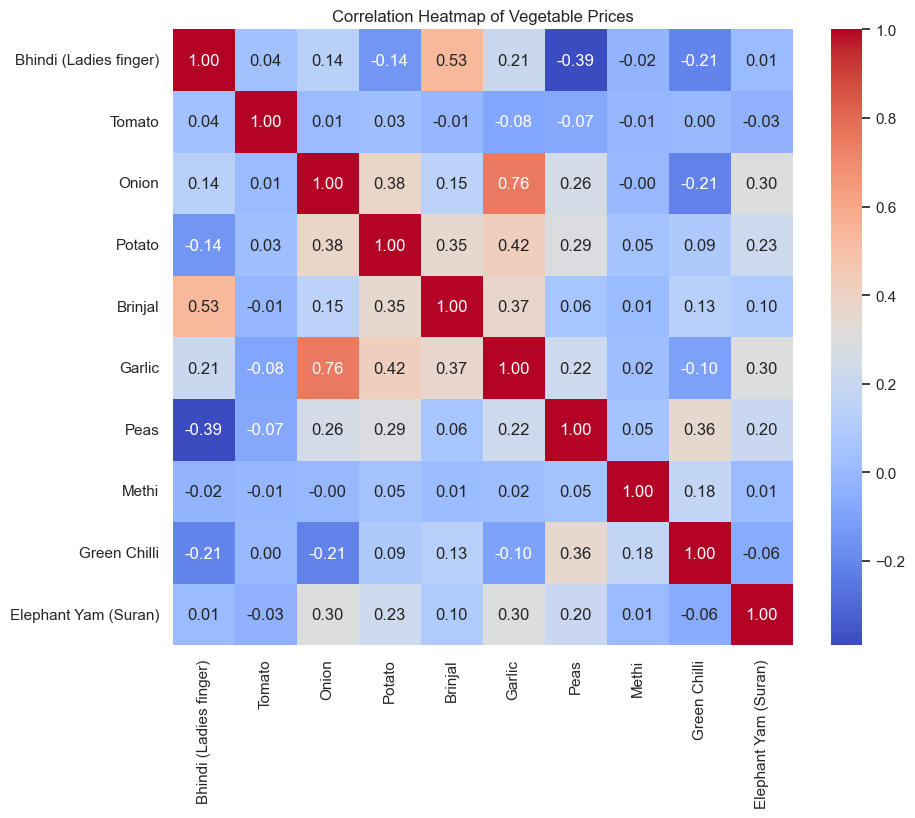

In [222]:
plt.figure(figsize=(10, 8))
sns.heatmap(vegetable_prices[price_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Vegetable Prices')
plt.show()

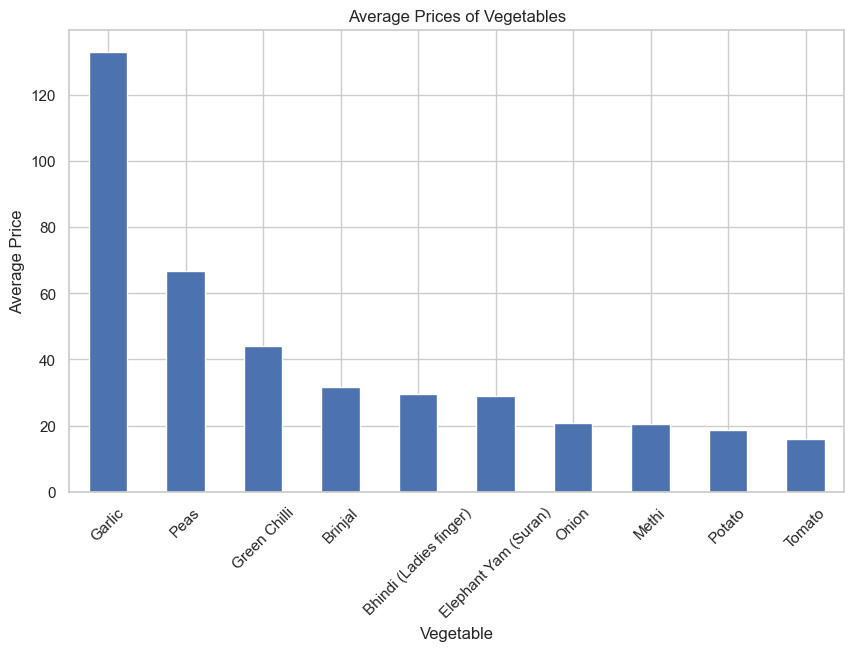

In [223]:
avg_prices = vegetable_prices[price_columns].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Average Prices of Vegetables')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The bar graph reveals that **Garlic**, **Peas**, and **Green Chili** are the top three most expensive vegetables, with Garlic being significantly more expensive. On the other hand, **Tomato**, **Potato**, and **Methi** are the least expensive vegetables.


**Quarterly Vegetable Price Analysis**

In this cell, we extract the quarter from the 'Price Dates' column and calculate the average prices for each vegetable by quarter. The prices are sorted and visualized using a bar graph to compare the price trends across quarters. Different colors represent each quarter, allowing for a clear comparison of seasonal price variations.


<Figure size 1600x1600 with 0 Axes>

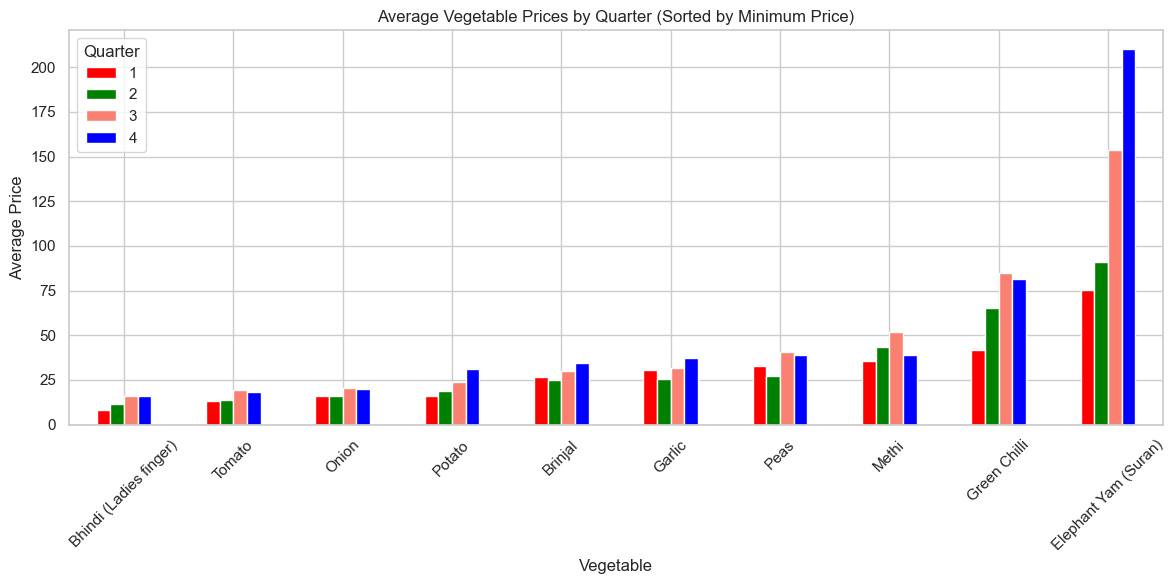

In [224]:
# Extract quarter from 'Price Dates'
vegetable_prices['Quarter'] = vegetable_prices['Price Dates'].dt.quarter

# Calculate average prices for each vegetable for each quarter
average_prices_by_quarter = vegetable_prices.groupby('Quarter')[price_columns].mean().transpose()

# Sort each vegetable's prices across quarters
sorted_average_prices = average_prices_by_quarter.apply(lambda x: x.sort_values().values)

# Create a bar graph to visualize sorted average prices by quarter
plt.figure(figsize=(16, 16))
sorted_average_prices.plot(kind='bar', figsize=(12, 6), color=['red', 'green', 'salmon', 'blue'])
plt.title('Average Vegetable Prices by Quarter (Sorted by Minimum Price)')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

 **Observations:**

The bar graph reveals several interesting trends in vegetable prices across quarters:

- **Green Chili** and **Elephant Yam** show significant price variation, with **Elephant Yam** becoming particularly expensive in Q4.
- **Tomato** prices remain relatively constant throughout the year, showing minimal fluctuation across quarters.
- Other vegetables, such as **Onion**, **Potato**, and **Brinjal**, also exhibit slight increases, but their prices don't vary as much as Green Chili and Elephant Yam.
- It’s worth investigating whether the unusually high prices of **Elephant Yam** could be due to outliers missed during the data cleaning process. To explore this possibility, a box plot is presented next to examine price distributions and identify any potential anomalies.
- Additionally, prices generally rise in Q3 and Q4, raising the question of what factors might be driving this trend later in the year.


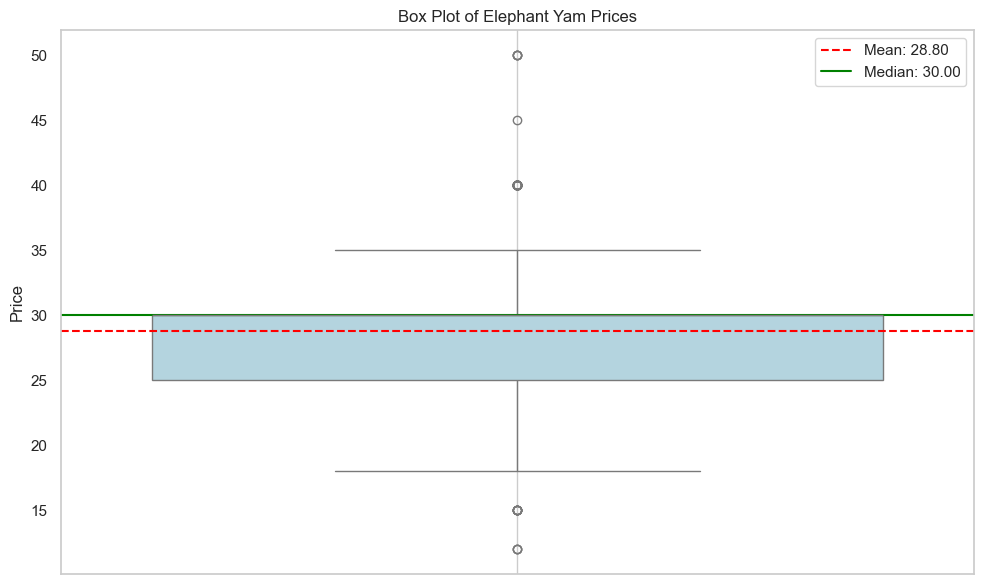

In [225]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a box plot for Elephant Yam prices
sns.boxplot(data=vegetable_prices, y='Elephant Yam (Suran)', color='lightblue')

# Calculate mean and median for Elephant Yam prices
mean_price = vegetable_prices['Elephant Yam (Suran)'].mean()
median_price = vegetable_prices['Elephant Yam (Suran)'].median()

# Plot the mean and median as horizontal lines
plt.axhline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axhline(median_price, color='green', linestyle='-', label=f'Median: {median_price:.2f}')

# Adding labels and title
plt.title('Box Plot of Elephant Yam Prices')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Imputing Outliers in Elephant Yam Prices**

The boxplot revealed 5 outliers in the Elephant Yam prices, with three exceeding the upper whisker and two falling below the lower whisker (Q1). To address these outliers, we imputed them with the median price. Given that only five values are affected, this imputation is unlikely to significantly alter the overall distribution of the data. This approach helps enhance the model's performance by minimizing the distortion caused by these anomalies, as shown in the code cell below.


In [226]:
# Define the column and calculate the IQR for outliers
Q1, Q3 = vegetable_prices['Elephant Yam (Suran)'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Impute outliers with the median
median_price = vegetable_prices['Elephant Yam (Suran)'].median()
vegetable_prices['Elephant Yam (Suran)'] = vegetable_prices['Elephant Yam (Suran)'].apply(
    lambda x: median_price if x < lower_bound or x > upper_bound else x
)

# Display the updated column
display(vegetable_prices['Elephant Yam (Suran)'].head())


0    25.0
1    25.0
2    25.0
3    25.0
4    25.0
Name: Elephant Yam (Suran), dtype: float64

 **Elephant Yam Price Distribution:**

The box plot illustrates the distribution of **Elephant Yam** prices, with a median price situated near the upper quartile (Q3), indicating a skewed distribution. Additionally, several outliers are identified, as shown by the dots above and below the whiskers. This further supports the earlier observation that the unusually high prices of Elephant Yam may warrant further investigation. The mean price, represented by the red dashed line, is higher than the median, reinforcing the presence of skewness and potential anomalies in the data.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [227]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [228]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [229]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [230]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [231]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
- **Nkhubalale Emmanuel Nkadimeng**: [GitHub Repository](https://github.com/NKHUBALALE/Workplace-module)  
This project was developed and executed by a single contributor under the supervision of ExploreAI Academy.

- **Project Management**: [Trello Board](https://trello.com/b/ZudSrZoj/vegetable-prices)


In [262]:
from huggingface_hub import login

login()

In [264]:
from datasets import load_dataset

dataset = load_dataset("satellogic/EarthView")
dataset.head()

Resolving data files:   0%|          | 0/607 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/607 [00:00<?, ?it/s]

train-00000-of-00607.parquet:   0%|          | 0.00/343M [00:00<?, ?B/s]

train-00001-of-00607.parquet:   0%|          | 0.00/400M [00:00<?, ?B/s]

train-00002-of-00607.parquet:   0%|          | 0.00/398M [00:00<?, ?B/s]

train-00003-of-00607.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

train-00004-of-00607.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

train-00005-of-00607.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

train-00006-of-00607.parquet:   0%|          | 0.00/364M [00:00<?, ?B/s]

train-00007-of-00607.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

train-00008-of-00607.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

train-00009-of-00607.parquet:   0%|          | 0.00/368M [00:00<?, ?B/s]

train-00010-of-00607.parquet:   0%|          | 0.00/358M [00:00<?, ?B/s]

train-00011-of-00607.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

train-00012-of-00607.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

train-00013-of-00607.parquet:   0%|          | 0.00/363M [00:00<?, ?B/s]

train-00014-of-00607.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

train-00015-of-00607.parquet:   0%|          | 0.00/308M [00:00<?, ?B/s]

train-00016-of-00607.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

train-00017-of-00607.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

train-00018-of-00607.parquet:   0%|          | 0.00/358M [00:00<?, ?B/s]

train-00019-of-00607.parquet:   0%|          | 0.00/408M [00:00<?, ?B/s]

train-00020-of-00607.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

train-00021-of-00607.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

train-00022-of-00607.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

train-00023-of-00607.parquet:   0%|          | 0.00/421M [00:00<?, ?B/s]

train-00024-of-00607.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

train-00025-of-00607.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00026-of-00607.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

train-00027-of-00607.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00028-of-00607.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

train-00029-of-00607.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

train-00030-of-00607.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

train-00031-of-00607.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00032-of-00607.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

train-00033-of-00607.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00034-of-00607.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

train-00035-of-00607.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

train-00036-of-00607.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

train-00037-of-00607.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00038-of-00607.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00039-of-00607.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

train-00040-of-00607.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00041-of-00607.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00042-of-00607.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

train-00043-of-00607.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

train-00044-of-00607.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

train-00045-of-00607.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

train-00046-of-00607.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

train-00047-of-00607.parquet:   0%|          | 0.00/407M [00:00<?, ?B/s]

train-00048-of-00607.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

train-00049-of-00607.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

train-00050-of-00607.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

train-00052-of-00607.parquet:   0%|          | 0.00/405M [00:00<?, ?B/s]

FileNotFoundError: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.